## Train Test Split

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv("./data/processed/05_resampled_data.csv")

In [3]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,target
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,3.0,-0.432287,-0.738126,-0.200417,1.428604,-0.604022,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,3.0,0.011234,-1.702582,-0.145472,0.071880,-0.769249,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.546830,0.050449,-0.029813,-0.394215,-0.344381,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.518986,-1.702582,-0.037462,-0.001773,-0.769249,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,-0.013091,-0.002513,-0.149319,-0.131422,-0.367985,0


In [5]:
X = data.drop('target', axis=1)
y = data['target']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:
X_train.shape, X_test.shape

((13629, 24), (3408, 24))

In [8]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [9]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [10]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [11]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

## Model Training 

In [13]:
base_model_report =evaluate_models(X=X, y=y, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9513
- F1 score: 0.9553
- Precision: 0.9476
- Recall: 0.9630
- Roc Auc Score: 0.9503


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9263
- F1 score: 0.9323
- Precision: 0.9260
- Recall: 0.9386
- Roc Auc Score: 0.9253


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8897
- F1 score: 0.8965
- Precision: 0.9068
- Recall: 0.8865
- Roc Auc Score: 0.8900
----------------------------------
Model performance for Test set
- Accuracy: 0.8791
- F1 score: 0.8875
- Precision: 0.8919
- Recall: 0.8832
- Roc Auc Score: 0.8788


Logistic Regression
Model performance for Training 

**Results of All Models**

In [14]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.951291
4,K-Neighbors Classifier,0.941608
5,XGBClassifier,0.935153
6,CatBoosting Classifier,0.928110
1,Decision Tree,0.926350
2,Gradient Boosting,0.879108
7,Support Vector Classifier,0.857101
8,AdaBoost Classifier,0.849178
3,Logistic Regression,0.725646


**Here we can use Random Forest for Hyper Parameter Tuning** 
                               


**Define the parameter distribution for Random forest**

**Create a function for model training and report which can be used in hyperparameter tuning loop**

In [15]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grids
xgboost_params = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9]
}

# List of models with their parameters
randomcv_models = [
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), xgboost_params),
    ('RandomForest', RandomForestClassifier(), rf_params),
    ('KNN', KNeighborsClassifier(), knn_params)
]

# Dictionary to store best parameters
model_param = {}

# Perform RandomizedSearchCV for each model
for name, model, params in randomcv_models:
    print(f"\n🔍 Starting RandomizedSearchCV for: {name}")
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,         # Can be reduced if too slow
        cv=3,
        verbose=2,
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X, y)  # Use the correct features/target
    model_param[name] = random_search.best_params_

# Display the best parameters
for model_name, best_params in model_param.items():
    print(f"\n---------------- Best Params for {model_name} ----------------")
    for param, value in best_params.items():
        print(f"{param}: {value}")



🔍 Starting RandomizedSearchCV for: XGBoost
Fitting 3 folds for each of 12 candidates, totalling 36 fits

🔍 Starting RandomizedSearchCV for: RandomForest
Fitting 3 folds for each of 60 candidates, totalling 180 fits

🔍 Starting RandomizedSearchCV for: KNN
Fitting 3 folds for each of 40 candidates, totalling 120 fits

---------------- Best Params for XGBoost ----------------
min_child_weight: 1
max_depth: 9

---------------- Best Params for RandomForest ----------------
n_estimators: 200
max_features: sqrt
max_depth: None

---------------- Best Params for KNN ----------------
weights: distance
n_neighbors: 4
algorithm: auto


In [16]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 9},
 'RandomForest': {'n_estimators': 200,
  'max_features': 'sqrt',
  'max_depth': None},
 'KNN': {'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}}

## Retraining the Model with best Parameters

In [19]:
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RandomForest']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'], n_jobs=-1),
}

tuned_report = evaluate_models(X=X, y=y, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9516
- F1 score: 0.9555
- Precision: 0.9481
- Recall: 0.9630
- Roc Auc Score: 0.9506


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9683
- F1 score: 0.9711
- Precision: 0.9577
- Recall: 0.9848
- Roc Auc Score: 0.9669


XGBClassifier
Model performance for Training set
- Accuracy: 0.9993
- F1 score: 0.9993
- Precision: 0.9986
- Recall: 1.0000
- Roc Auc Score: 0.9992
----------------------------------
Model performance for Test set
- Accuracy: 0.9457
- F1 score: 0.9499
- Precision: 0.9475
- Recall: 0.9522
- Roc Auc Score: 0.9452




In [20]:
tuned_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.968310
0,Random Forest Classifier,0.951585
2,XGBClassifier,0.945716


In [21]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9663
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1570
           1       0.95      0.99      0.97      1838

    accuracy                           0.97      3408
   macro avg       0.97      0.96      0.97      3408
weighted avg       0.97      0.97      0.97      3408



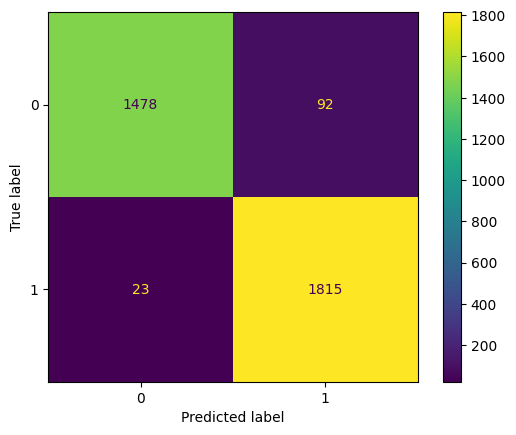

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

## Best Model is K-Nearest Neighbor(KNN) with Accuracy 96.66%

In [26]:
import os
import joblib

# Specify the directory where you want to save the model
model_directory = '../models/'

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

# Now save the model
joblib.dump(best_model, os.path.join(model_directory, 'best_knn_model.pkl'))


['../models/best_knn_model.pkl']